# Fourier Series

The Fourier series is a way to represent a periodic function as a sum of sines and cosines. The Fourier series is given by:

$$f(t) = \frac{a_0}{2} + \sum_{n=1}^{\infty} \left( a_n \cos\left(\frac{2\pi n t}{T}\right) + b_n \sin\left(\frac{2\pi n t}{T}\right) \right)$$

where $T$ is the period of the function and $a_0$, $a_n$, and $b_n$ are the Fourier coefficients. The Fourier coefficients are given by:

$$a_0 = \frac{2}{T} \int_{0}^{T} f(t) dt$$

$$a_n = \frac{2}{T} \int_{0}^{T} f(t) \cos\left(\frac{2\pi n t}{T}\right) dt$$

$$b_n = \frac{2}{T} \int_{0}^{T} f(t) \sin\left(\frac{2\pi n t}{T}\right) dt$$

The Fourier series can be used to represent any periodic function, and the coefficients can be found using the integrals above.

# Example 1: Sine Wave

The Fourier series can be used to represent a sine wave, of frequency $f$. The equation of this sine wave is:

$$f(t) = \sin(2\pi f t) = \sin(\frac{2\pi t}{T})$$

With this in mind, we would expect to find that $a_0 = 0$, $a_n = 0$, and $b_n = 1$ for $n=1$, and zero for all $n>1$.

The period is $T = 1/f$, so the Fourier coefficients are:

$$a_0 = \frac{2}{T} \int_{0}^{T} \sin(\frac{2\pi t}{T}) dt$$
$$ = \frac{2}{T} \frac{T}{2\pi} \left[ -\cos(\frac{2\pi t}{T} \right]_0^T$$
$$ = \frac{1}{\pi} \left[ -1 - (-1) \right] = 0$$

$$a_n = \frac{2}{T} \int_{0}^{T} \sin(\frac{2\pi t}{T}) \cos\left(\frac{2\pi n t}{T}\right) dt$$

Because we have an integral of an odd function times an even function,over a complete period, the integral will be zero, for any $n$.

$$b_n = \frac{2}{T} \int_{0}^{T} \sin(\frac{2\pi t}{T}) \sin\left(\frac{2\pi n t}{T}\right) dt$$

We can evaluate this integral using Wolfram Alpha, and the result is:

$$b_n = \delta_{n1}$$

## Example 2: Square Wave

The Fourier series can also be used to represent a square wave. The equation of this square wave is:

$$f(t) = \begin{cases} 1 & \text{if } 0 \leq t < T/2 \\ -1 & \text{if } T/2 \leq t < T \end{cases}$$

The period is $T$, so the Fourier coefficients are:

$$a_0 = \frac{2}{T} \int_{0}^{T} f(t) dt$$

$$a_n = \frac{2}{T} \int_{0}^{T} f(t) \cos\left(\frac{2\pi n t}{T}\right) dt = 0$$

$$b_n = \frac{2}{T} \int_{0}^{T} f(t) \sin\left(\frac{2\pi n t}{T}\right) dt$$

$$ = \frac{2}{T} \int_{0}^{T/2} \sin\left(\frac{2\pi n t}{T}\right) dt - \frac{2}{T} \int_{T/2}^{T} \sin\left(\frac{2\pi n t}{T}\right) dt $$

$$= \frac{2}{T} \left( \frac{-T}{2\pi n} \cos\left(\frac{2\pi n t}{T}\right) \right) \Bigg|_{0}^{T/2} - \frac{2}{T} \left( \frac{-T}{2\pi n} \cos\left(\frac{2\pi n t}{T}\right) \right) \Bigg|_{T/2}^{T} = $$

$$= \frac{2}{T} \left( \frac{-T}{2\pi n} \cos\left(\frac{2\pi n T}{2T}\right) - \frac{-T}{2\pi n} \cos\left(0\right) \right) - \frac{2}{T} \left( \frac{-T}{2\pi n} \cos\left(\pi n\right) - \frac{-T}{2\pi n} \cos\left(\frac{2\pi n T}{2T}\right) \right) = $$



$$=\frac{4}{n\pi} \text{ for } n \text{ odd}$$

Sd, the Fourier series for a square wave is:

$$f(t) = \sum_{n=1,3,5,...}^{\infty} \frac{4}{n\pi} \sin\left(\frac{2\pi n t}{T}\right)$$

$$ = \frac{4}{\pi} \sin(\frac{2\pi t}{T}) + \frac{4}{3\pi} \sin(\frac{6\pi t}{T}) + \frac{4}{5\pi} \sin(\frac{10\pi t}{T}) + ...$$

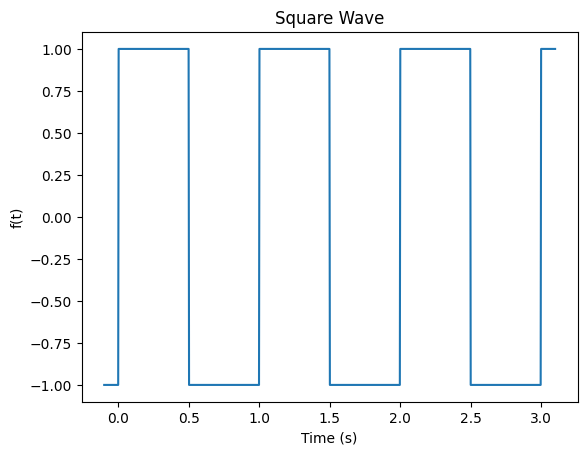

In [20]:
# Construct and plot the square wave

import numpy as np
import matplotlib.pyplot as plt

# Define the square wave function
def square_wave(t, T):
    if t % T < T/2:
        return 1
    else:
        return -1
    
# Create an array of time values
t = np.linspace(-0.1, 3.1, 1000)

# Create an array of square wave values
f = np.array([square_wave(ti, 1) for ti in t])

# Plot the square wave
plt.plot(t, f)
plt.xlabel('Time (s)')
plt.ylabel('f(t)')
plt.title('Square Wave')
plt.show()

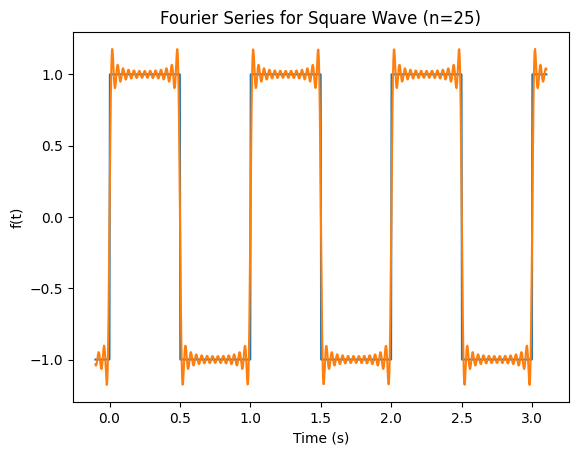

In [24]:
# Calculate the Fourier series for the square wave

# Define the Fourier series function
def fourier_series(t, T, n_max):
    f = 0
    for n in range(1, n_max+2, 2):
        f += 4/(n*np.pi) * np.sin(2*np.pi*n*t/T)
    return f

# choose period
T = 1

# Choose n
n_max = 25

# Create an array of Fourier series values
f_fourier_3 = np.array([fourier_series(ti, T, n_max) for ti in t])

# Plot the Fourier series and the square wave
plt.plot(t, f)
plt.plot(t, f_fourier_3)
plt.xlabel('Time (s)')
plt.ylabel('f(t)')
plt.title('Fourier Series for Square Wave (n=25)')
plt.show()

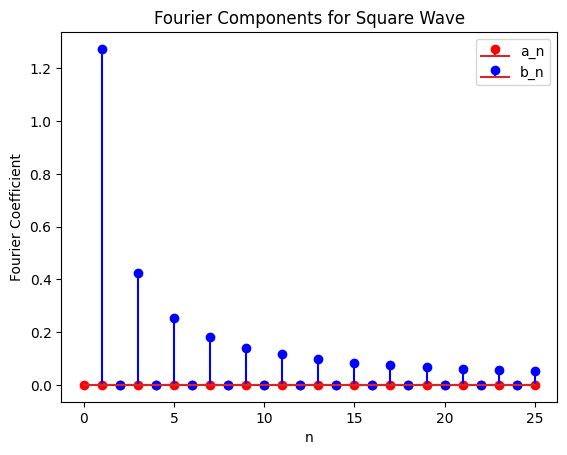

In [32]:
# Plot the Fourier Components for the square wave

# Create an array of Fourier series values
xa = np.linspace(0, n_max, n_max+1)
xb = np.linspace(1, n_max, n_max)
#print(xa)
#print(xb)
a_n = np.array([0]*(n_max+1))
b_n = np.array([4/(n*np.pi) if n%2==1 else 0 for n in range(1, n_max+1)])

# Plot the Fourier components
plt.stem(xa, a_n, 'r.',label='a_n')
plt.stem(xb, b_n, 'b.',label='b_n')
plt.xlabel('n')
plt.ylabel('Fourier Coefficient')
plt.title('Fourier Components for Square Wave')
plt.legend()
    


# Conclusions

If we know the exact form of the function, $f(t)$, we can calculate the Fourier coefficients, and use them to calculate the Fourier series. This can be used to represent the function as a sum of sines and cosines.

We can extend the Fourier series to represent any periodic function, and the coefficients can be found using the integrals above. The Fourier series can be used to represent any periodic function, and the coefficients can be found using the integrals above.

Again, we can simply evaluate the Fourier coefficients to as large a value of $n$ as we like, and the Fourier series will converge to the original function. This is a powerful result, and is the basis for many applications of the Fourier series in engineering and physics.

However, it is very important to note that as we increase the value of $n$, we are also increasing the frequency of the sines and cosines in the Fourier series. In the real world, we are often limited by the frequency response of our measurement devices, and so we may not be able to measure the high frequency components of a signal. This is a very important consideration when using the Fourier series in practice.

We will investigate this effect in the next notebook.



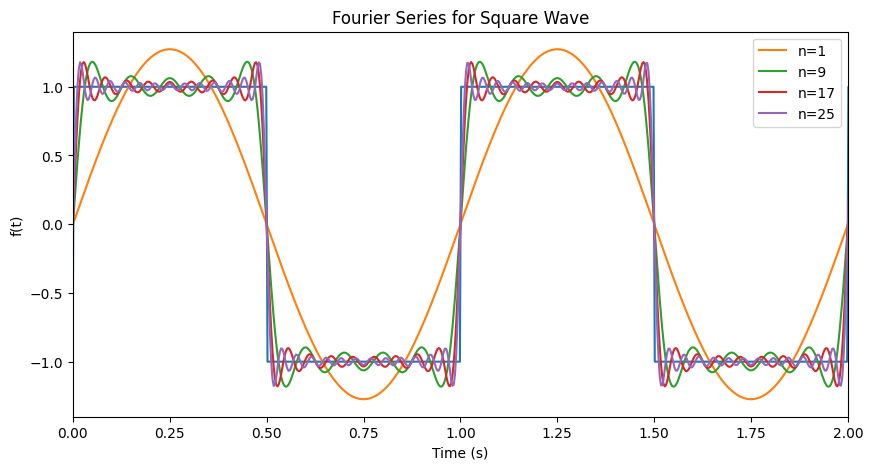

In [38]:
f_fourier_list = []
    
# Plot the Fourier series and the square wave

fig, ax = plt.subplots(figsize=(10, 5))
plt.plot(t, f)

for nmax in range(1,26,8):
    f_fourier_list.append(np.array([fourier_series(ti, T, nmax) for ti in t]))
    plt.plot(t, f_fourier_list[-1], label=f'n={nmax}')

plt.xlabel('Time (s)')
plt.ylabel('f(t)')
plt.title('Fourier Series for Square Wave')
plt.legend()
plt.xlim(0, 2)
plt.show()